# Data Wrangling: Sydney Airbnb Listings

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load listings data
listings_raw = pd.read_csv('/Users/marianne_tan/Desktop/Capstone Project/datasets/listings.csv',low_memory=False)

# Load calendar data
calendar_raw = pd.read_csv('/Users/marianne_tan/Desktop/Capstone Project/datasets/calendar.csv',low_memory=False)

# Clean Listings Data

In [3]:
listings_raw.shape

(33430, 96)

In [4]:
# Get list of column names
listings_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
# Select relevant columns
listings = listings_raw[[
     "id"
    ,"host_id"
    ,"host_since"
    ,"host_response_time"
    ,"host_response_rate"
    ,"host_is_superhost"
    ,"host_listings_count"
    ,"host_identity_verified"
    ,"neighbourhood"
    ,"zipcode"
    ,"property_type"
    ,"room_type"
    ,"accommodates"                      
    ,"bathrooms"
    ,"bedrooms"
    ,"amenities"
    ,"price"
    ,"minimum_nights"
    ,"number_of_reviews"
    ,"review_scores_rating"
    ,"instant_bookable"
    ,"is_business_travel_ready"
    ,"cancellation_policy" 
]]

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33430 entries, 0 to 33429
Data columns (total 23 columns):
id                          33430 non-null int64
host_id                     33430 non-null int64
host_since                  33347 non-null object
host_response_time          14249 non-null object
host_response_rate          14249 non-null object
host_is_superhost           33347 non-null object
host_listings_count         33347 non-null float64
host_identity_verified      33347 non-null object
neighbourhood               28183 non-null object
zipcode                     33254 non-null object
property_type               33430 non-null object
room_type                   33430 non-null object
accommodates                33430 non-null int64
bathrooms                   33408 non-null float64
bedrooms                    33421 non-null float64
amenities                   33430 non-null object
price                       33430 non-null object
minimum_nights              33430 non-nul

In [7]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,...,bathrooms,bedrooms,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy
0,11154941,573182,2011-05-10,NaN,NaN,f,1.0,t,Newtown/Enmore,2042,...,1.5,1.0,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Smok...",$33.00,6,1,100.0,f,f,flexible
1,11169113,56897899,2016-01-31,within a few hours,100%,t,3.0,f,Balgowlah,2093,...,1.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$245.00,1,8,100.0,f,f,strict_14_with_grace_period
2,12119402,15469257,2014-05-13,within an hour,100%,f,120.0,f,Central Business District,2000,...,2.0,2.0,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",$295.00,28,10,94.0,t,f,strict_14_with_grace_period
3,13019921,66013615,2016-04-06,NaN,NaN,f,1.0,f,Paddington,2021,...,1.0,2.0,"{TV,Internet,Wifi,Pool,Kitchen,""Free parking o...",$219.00,14,0,NaN,f,f,strict_14_with_grace_period
4,11849408,16357713,2014-06-04,within an hour,83%,f,96.0,t,Mosman,2088,...,1.0,3.0,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",$343.00,7,1,100.0,t,f,super_strict_60


In [8]:
# Determine number of missing values in columns
len(listings) - listings.count()

id                              0
host_id                         0
host_since                     83
host_response_time          19181
host_response_rate          19181
host_is_superhost              83
host_listings_count            83
host_identity_verified         83
neighbourhood                5247
zipcode                       176
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      22
bedrooms                        9
amenities                       0
price                           0
minimum_nights                  0
number_of_reviews               0
review_scores_rating        10809
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
dtype: int64

In [9]:
# Review columns with missing values
listings.loc[:, listings.isnull().any()]

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,bathrooms,bedrooms,review_scores_rating
0,2011-05-10,NaN,NaN,f,1.0,t,Newtown/Enmore,2042,1.5,1.0,100.0
1,2016-01-31,within a few hours,100%,t,3.0,f,Balgowlah,2093,1.0,2.0,100.0
2,2014-05-13,within an hour,100%,f,120.0,f,Central Business District,2000,2.0,2.0,94.0
3,2016-04-06,NaN,NaN,f,1.0,f,Paddington,2021,1.0,2.0,NaN
4,2014-06-04,within an hour,83%,f,96.0,t,Mosman,2088,1.0,3.0,100.0
5,2015-10-25,NaN,NaN,f,0.0,t,Chippendale,2008,1.0,1.0,88.0
6,2014-03-05,within an hour,100%,f,1.0,t,Woolloomooloo,2011,1.0,2.0,93.0
7,2016-05-05,within an hour,100%,f,38.0,t,Darlinghurst,2000,1.0,2.0,88.0
8,2015-01-21,NaN,NaN,f,1.0,t,Alexandria,2015,1.5,1.0,100.0
9,2016-07-13,NaN,NaN,f,1.0,f,Paddington,2021,2.0,1.0,NaN


In [10]:
# Drop NaN values - exclude host reponse time/rate, neighbourhood and review scores
listings = listings.dropna(how='any', subset=['host_since','host_is_superhost','host_listings_count',
                                              'host_identity_verified','zipcode','bathrooms','bedrooms'])

# Convert formatting of price and response rate
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','').astype('float64')
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype('float64')
                                                                            
                                                                            
# Change f/t values to binary 0/1
listings['host_is_superhost'] = listings['host_is_superhost'].replace('t',1)
listings['host_is_superhost'] = listings['host_is_superhost'].replace('f',0)
listings['host_identity_verified'] = listings['host_identity_verified'].replace('t',1)
listings['host_identity_verified'] = listings['host_identity_verified'].replace('f',0)
listings['instant_bookable'] = listings['instant_bookable'].replace('t',1)
listings['instant_bookable'] = listings['instant_bookable'].replace('f',0)                                                                            
listings['is_business_travel_ready'] = listings['is_business_travel_ready'].replace('t',1)
listings['is_business_travel_ready'] = listings['is_business_travel_ready'].replace('f',0) 

listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,...,bathrooms,bedrooms,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy
0,11154941,573182,2011-05-10,NaN,NaN,0,1.0,1,Newtown/Enmore,2042,...,1.5,1.0,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Smok...",33.0,6,1,100.0,0,0,flexible
1,11169113,56897899,2016-01-31,within a few hours,100.0,1,3.0,0,Balgowlah,2093,...,1.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",245.0,1,8,100.0,0,0,strict_14_with_grace_period
2,12119402,15469257,2014-05-13,within an hour,100.0,0,120.0,0,Central Business District,2000,...,2.0,2.0,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",295.0,28,10,94.0,1,0,strict_14_with_grace_period
3,13019921,66013615,2016-04-06,NaN,NaN,0,1.0,0,Paddington,2021,...,1.0,2.0,"{TV,Internet,Wifi,Pool,Kitchen,""Free parking o...",219.0,14,0,NaN,0,0,strict_14_with_grace_period
4,11849408,16357713,2014-06-04,within an hour,83.0,0,96.0,1,Mosman,2088,...,1.0,3.0,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",343.0,7,1,100.0,1,0,super_strict_60


In [11]:
listings.shape

(33140, 23)

In [12]:
listings.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
count,3.314000e+04,3.314000e+04,14159.000000,33140.000000,33140.000000,33140.000000,33140.000000,33140.000000,33140.00000,33140.000000,33140.000000,33140.00000,22476.000000,33140.000000,33140.0
mean,1.689382e+07,5.932521e+07,93.161876,0.124955,8.269101,0.408962,3.376071,1.351267,1.59306,206.690495,5.103983,12.66213,93.548986,0.383917,0.0
std,7.709454e+06,5.776017e+07,19.225348,0.330673,29.765344,0.491650,2.221289,0.667943,1.10757,344.937832,16.455603,29.08817,9.560395,0.486345,0.0
min,1.235100e+04,8.346000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.00000,20.000000,0.000000,0.0
25%,1.023528e+07,1.376474e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.00000,78.000000,1.000000,0.00000,91.000000,0.000000,0.0
50%,1.816792e+07,3.666500e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.00000,130.000000,2.000000,2.00000,97.000000,0.000000,0.0
75%,2.272279e+07,9.578568e+07,100.000000,0.000000,2.000000,1.000000,4.000000,1.500000,2.00000,219.000000,5.000000,10.00000,100.000000,1.000000,0.0
max,2.905160e+07,2.189189e+08,100.000000,1.000000,258.000000,1.000000,70.000000,14.000000,46.00000,14999.000000,1000.000000,481.00000,100.000000,1.000000,0.0


In [13]:
# Look into 0 values of host_listings_count and price
print('No. of host listings count 0:', len(listings[listings['host_listings_count'] == 0]))
print('No of price 0:', len(listings[listings['price'] == 0]))

No. of host listings count 0: 40
No of price 0: 10


In [14]:
# Drop 0 values
listings = listings[listings['host_listings_count'] != 0]
listings = listings[listings['price'] != 0]

In [15]:
# Review accommodates column - the max value should be 16
listings['accommodates'].value_counts(dropna=False)

2     14271
4      6177
1      3441
6      2785
3      2045
5      1527
8      1271
7       647
10      423
9       222
12      114
11       66
16       32
15       27
14       23
13       18
70        1
Name: accommodates, dtype: int64

In [16]:
# Drop outlier for accommodates
listings = listings[listings['accommodates'] <= 16]

In [17]:
listings.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
count,3.308900e+04,3.308900e+04,14151.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,22449.000000,33089.000000,33089.0
mean,1.689913e+07,5.934079e+07,93.168610,0.125026,8.278189,0.408867,3.374626,1.351386,1.592191,206.387228,5.106833,12.667503,93.551695,0.384146,0.0
std,7.710070e+06,5.777659e+07,19.210884,0.330754,29.785387,0.491632,2.191592,0.668119,1.092592,335.439474,16.467237,29.093685,9.557280,0.486400,0.0
min,1.235100e+04,8.346000e+03,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,20.000000,0.000000,0.0
25%,1.023703e+07,1.376457e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,78.000000,1.000000,0.000000,91.000000,0.000000,0.0
50%,1.818026e+07,3.665886e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,130.000000,2.000000,2.000000,97.000000,0.000000,0.0
75%,2.273288e+07,9.580649e+07,100.000000,0.000000,2.000000,1.000000,4.000000,1.500000,2.000000,219.000000,5.000000,10.000000,100.000000,1.000000,0.0
max,2.905160e+07,2.189189e+08,100.000000,1.000000,258.000000,1.000000,16.000000,14.000000,46.000000,13456.000000,1000.000000,481.000000,100.000000,1.000000,0.0


In [18]:
# Review categorical data
print(listings['zipcode'].value_counts(dropna=False))
print(listings['room_type'].value_counts(dropna=False))
print(listings['property_type'].value_counts(dropna=False))
print(listings['cancellation_policy'].value_counts(dropna=False))

2026          3709
2010          1987
2095          1134
2000          1091
2011          1021
2031           973
2034           885
2017           707
2042           660
2021           595
2022           579
2016           579
2035           565
2024           554
2096           508
2088           494
2099           453
2107           444
2009           434
2008           410
2037           402
2093           382
2065           375
2060           368
2007           343
2041           322
2127           311
2015           304
2029           304
2023           291
              ... 
NSW 2022         2
2753             2
2688             1
5893             1
2216\n2216       1
1711             1
3204             1
4215             1
7658             1
2091             1
1783             1
2175             1
7042             1
7441             1
4953             1
2313             1
8001             1
2304             1
3150             1
2556             1
2766\n2766       1
2178        

In [19]:
# Drop inconsistent zipcode values - Sydney has 4 digit zipcodes
listings = listings[listings['zipcode'].str.len() == 4]

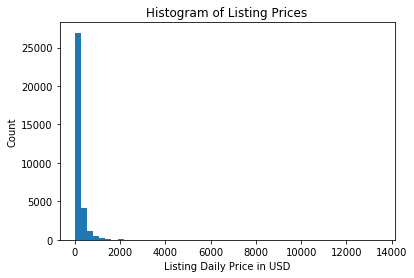

In [20]:
# Visualize pricing distribution
plt.hist(listings['price'],bins=50)
plt.title("Histogram of Listing Prices")
plt.xlabel("Listing Daily Price in USD")
plt.ylabel("Count")
plt.show()

In [21]:
# Review listings with price > $2000
listings[listings['price'] > 2000]

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,...,bathrooms,bedrooms,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy
888,1548191,6676972,2013-05-31,within an hour,100.0,0,48.0,0,NaN,2106,...,4.0,4.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",2516.0,14,2,100.0,0,0,super_strict_30
2521,4367971,22674861,2014-10-18,NaN,NaN,0,2.0,1,NaN,2100,...,2.0,5.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5000.0,3,3,90.0,0,0,flexible
2555,4379713,22741365,2014-10-20,NaN,NaN,0,1.0,1,Avalon,2107,...,4.5,5.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2250.0,7,4,100.0,0,0,strict_14_with_grace_period
2661,4424433,14768623,2014-04-26,NaN,NaN,0,1.0,0,Bronte,2024,...,4.5,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",3500.0,14,0,NaN,0,0,flexible
2873,4522635,23446220,2014-11-07,NaN,NaN,0,1.0,1,Bronte,2024,...,4.5,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",3000.0,7,0,NaN,0,0,moderate
3042,4672147,3231371,2012-08-12,within a day,84.0,0,23.0,1,Mosman,2088,...,4.0,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2600.0,2,8,97.0,0,0,strict_14_with_grace_period
3313,4903636,13507384,2014-03-25,NaN,NaN,0,1.0,1,Bondi,2026,...,1.0,1.0,{Essentials},12000.0,11,0,NaN,0,0,strict_14_with_grace_period
3978,5672896,20582809,2014-08-26,NaN,NaN,0,29.0,1,NaN,2106,...,4.5,4.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Wheelc...",2353.0,7,1,100.0,0,0,strict_14_with_grace_period
4121,5920943,3046924,2012-07-24,within a few hours,100.0,0,45.0,1,Palm Beach,2108,...,6.0,6.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5199.0,7,0,NaN,0,0,strict_14_with_grace_period
4898,7013003,36765852,2015-06-26,NaN,NaN,0,1.0,0,Pyrmont,2009,...,2.5,1.0,{},3454.0,1,0,NaN,0,0,flexible


0.31% of listings have a daily price > $2000

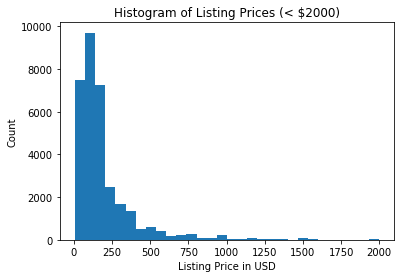

In [22]:
# Visualize pricing distribution
listings_below_2000 = listings[listings['price'] < 2000]
plt.hist(listings_below_2000['price'],bins=30)
plt.title("Histogram of Listing Prices (< $2000)")
plt.xlabel("Listing Price in USD")
plt.ylabel("Count")
plt.show()

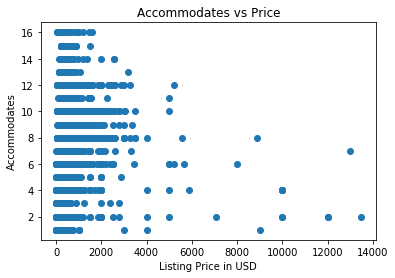

In [23]:
# Visualize accommodates vs price
plt.scatter(listings['price'],listings['accommodates'])
plt.xlabel('Listing Price in USD')
plt.ylabel('Accommodates')
plt.title('Accommodates vs Price')
plt.show()

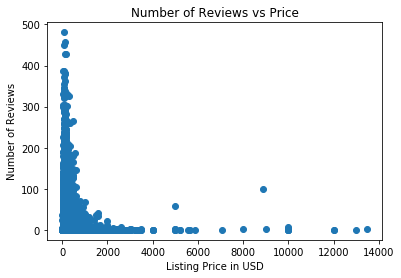

In [24]:
# Visualize number of reviews vs price
plt.scatter(listings['price'],listings['number_of_reviews'])
plt.xlabel('Listing Price in USD')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs Price')
plt.show()

In [25]:
# Review review scores rating
listings['review_scores_rating'].value_counts(dropna=False)

NaN       10638
 100.0     7854
 80.0      1401
 98.0      1395
 90.0      1369
 93.0      1363
 96.0      1265
 97.0      1255
 95.0      1166
 94.0       774
 99.0       769
 92.0       606
 87.0       462
 91.0       456
 88.0       339
 89.0       322
 60.0       281
 85.0       237
 86.0       152
 84.0       147
 70.0       133
 83.0       132
 20.0        83
 40.0        83
 73.0        71
 82.0        47
 75.0        46
 76.0        38
 67.0        27
 50.0        25
 78.0        24
 77.0        24
 81.0        21
 79.0        15
 72.0        15
 74.0        11
 65.0         9
 53.0         5
 69.0         5
 71.0         5
 64.0         4
 47.0         3
 68.0         3
 55.0         2
 44.0         1
 66.0         1
Name: review_scores_rating, dtype: int64

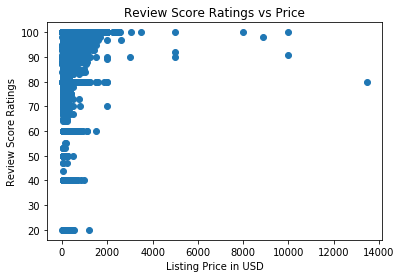

In [26]:
# Visualize number of review scores rating vs price
listings_with_reviews = listings[listings['number_of_reviews'] != 0]
plt.scatter(listings_with_reviews['price'],listings_with_reviews['review_scores_rating'])
plt.xlabel('Listing Price in USD')
plt.ylabel('Review Score Ratings')
plt.title('Review Score Ratings vs Price')
plt.show()

# Clean Calendar Data

In [27]:
calendar_raw.shape

(12199030, 4)

In [28]:
# Get list of column names
calendar_raw.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [29]:
calendar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12199030 entries, 0 to 12199029
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 372.3+ MB


In [30]:
calendar_raw.head()

,listing_id,date,available,price
0,11154941,2019-10-05,f,NaN
1,11154941,2019-10-04,f,NaN
2,11154941,2019-10-03,f,NaN
3,11154941,2019-10-02,f,NaN
4,11154941,2019-10-01,f,NaN


In [31]:
# Determine number of missing values in columns
len(calendar_raw) - calendar_raw.count()

listing_id          0
date                0
available           0
price         8913877
dtype: int64

In [32]:
# Drop NaN values
calendar_raw = calendar_raw.dropna(how='any')

In [33]:
# Remove $ from price
calendar_raw['price'] = calendar_raw['price'].str.replace('$','')
calendar_raw['price'] = calendar_raw['price'].str.replace(',','').astype('float64')

In [34]:
# Split date
split = pd.DataFrame()
split['year'] = pd.to_datetime(calendar_raw['date']).dt.year
split['month'] = pd.to_datetime(calendar_raw['date']).dt.month
split['day_of_week'] = pd.to_datetime(calendar_raw['date']).dt.dayofweek
split.head()

,year,month,day_of_week
386,2019,1,3
388,2019,1,1
389,2018,12,0
390,2018,12,6
391,2018,12,5


In [35]:
# Add new date columns into dataframe
calendar = calendar_raw.join(split,on=None,how='left',sort=False)
calendar.head()

,listing_id,date,available,price,year,month,day_of_week
386,11169113,2019-01-03,t,245.0,2019,1,3
388,11169113,2019-01-01,t,320.0,2019,1,1
389,11169113,2018-12-31,t,320.0,2018,12,0
390,11169113,2018-12-30,t,320.0,2018,12,6
391,11169113,2018-12-29,t,320.0,2018,12,5
